# <b>SMOTE for image generation/balancing dataset</b>

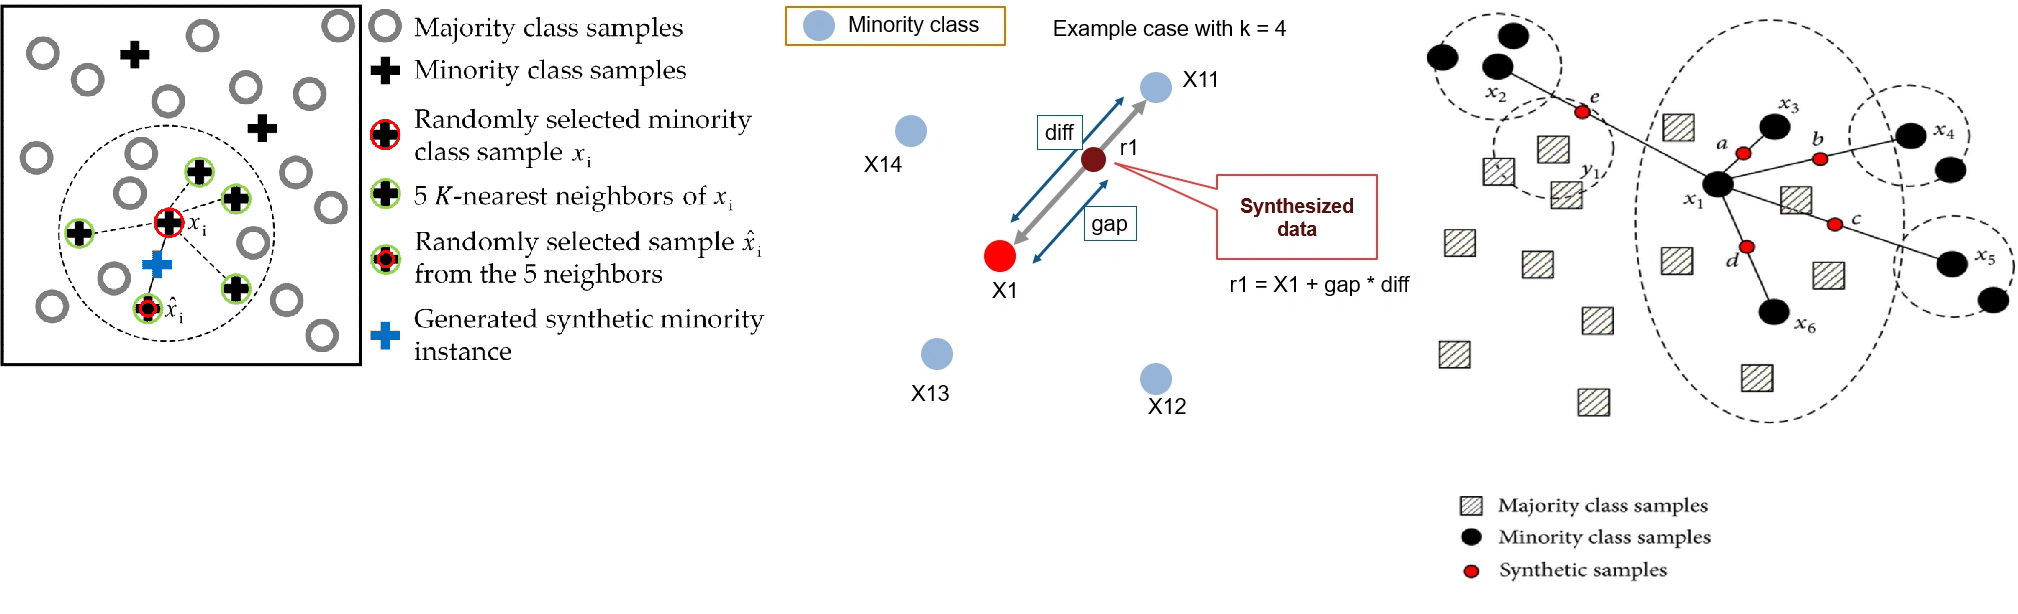

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

images[0] = [188 208 243 ... 139 135 170]

labels[0] = buildings

X/images: 
[[188 208 243 ... 139 135 170]
 [253 253 255 ...   9   9   9]
 [206 213 231 ...  89  66  25]
 ...
 [225 227 224 ...  87  90  95]
 [ 86 107 126 ... 148 173 170]
 [110 117 133 ... 152 155 162]]

y/labels: 
['buildings' 'buildings' 'buildings' ... 'glacier' 'glacier' 'glacier']

{'glacier': 2800, 'buildings': 1800, 'forest': 2200}


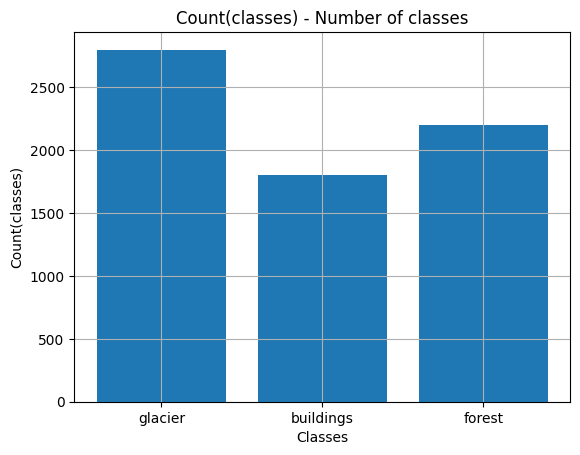

{'glacier': 400, 'buildings': 400, 'forest': 400}


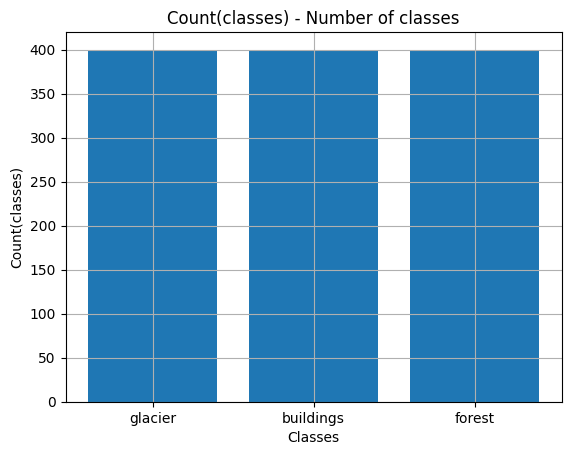

{'glacier': 400, 'buildings': 400, 'forest': 400}

In [ ]:
class ImageSMOTE:
    def __init__(self) -> None:
        self.label_encoder = LabelEncoder()
    
    """
    Fitting/loading the images and preprocessing to flatten vectors for SMOTE.
    """
    def fit(self, path_to_input_image_folder:str, width_of_image:int, height_of_image:int, debug:bool=False):
        self.images:list = []
        self.labels:list = []
        self.width_of_image = width_of_image
        self.height_of_image = height_of_image
        for file_name in os.listdir(path_to_input_image_folder):
            image = Image.open(f"{path_to_input_image_folder}/{file_name}")
            image = image.resize((self.width_of_image, self.height_of_image))
            image_array = np.array(image).flatten()
            self.images.append(image_array)
            self.labels.append(file_name.split('_')[0])  
        self.images = np.array(self.images)
        self.labels = np.array(self.labels)
        if debug:
            print(f"images[0] = {self.images[0]}\n")
            print(f"labels[0] = {self.labels[0]}\n")
            print(f"X/images: \n{self.images}\n")
            print(f"y/labels: \n{self.labels}\n")

    """
    Counting the number of classes and plotting the histogram
    """
    def count(self, path_to_image_folder:str, show_image=False):
        files = os.listdir(path_to_image_folder)
        names = []
        for file_name in files:
            name = file_name.split("_")[0]
            names.append(name)
        names = set(names)
        data = {}
        for i in names:
            data[i]=0
        for file_name in files:
            name = file_name.split("_")[0]
            data[name] = int(data[name])+1
        print(data)
        x = [value[0] for value in data.items()]
        y = [value[1] for value in data.items()]
        if show_image:
            plt.bar(x, y)
            plt.grid(True)
            plt.xlabel("Classes")
            plt.ylabel("Count(classes)")
            plt.title("Count(classes) - Number of classes")
            plt.show()
        return data
    
    """
    Balancing the dataset.
    """
    def balance(self, path_to_output_image_folder:str, debug=False):
        labels_encoded = self.label_encoder.fit_transform(self.labels)
        smote = SMOTE(sampling_strategy="auto", random_state=42)
        images_resampled, labels_resampled = smote.fit_resample(self.images, labels_encoded)
        if debug:
            print(f"Images resampled: \n{images_resampled}\n")
            print(f"Labels resampled: \n{labels_resampled}\n")
        if not os.path.exists(path_to_output_image_folder):
            os.makedirs(path_to_output_image_folder)
        for i in range(len(images_resampled)):
            image_array = images_resampled[i].reshape(self.width_of_image, self.height_of_image, 3)  
            image = Image.fromarray(np.uint8(image_array))
            label = self.label_encoder.inverse_transform([labels_resampled[i]])[0]
            file_name = f"{label}_{i}.png"
            image.save(f"{path_to_output_image_folder}/{file_name}")

#### CONFIGURATION #############
path_to_input_image_folder = "./dataset/training-SMOTE/buildings+forest+glacier/"
path_to_output_image_folder = "./dataset/training-SMOTE/buildings+forest+glacier_balanced/"
width_of_image = 150
height_of_image = 150
debug = True
###############################

image_smote = ImageSMOTE()
image_smote.fit(path_to_input_image_folder=path_to_input_image_folder, width_of_image=width_of_image, height_of_image=height_of_image, debug=debug)
image_smote.balance(path_to_output_image_folder=path_to_output_image_folder) # BALANCING THE DATASETs
image_smote.count(path_to_image_folder=path_to_input_image_folder, show_image=debug)
image_smote.count(path_to_image_folder=path_to_output_image_folder, show_image=debug)